<a href="https://colab.research.google.com/github/gemini106/LGMVIP-DataScience/blob/main/LGMVIPTask1_SANA_SUBHEDAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Iris Flower Classification using ML***


---





### **LGMVIP ( SEPTEMBER 2021 )**
(Data Analytics)

**Author : SANA SUBHEDAR**

# 1) Importing Essential Libraries




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import missingno as msno

# 2)Reading Data From Dataset

In [ ]:
df = pd.read_csv('iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 3) Checking Data-type,Non-Null Values and shape

In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.drop(columns='Id',inplace=True)


# 4) Data Visualization

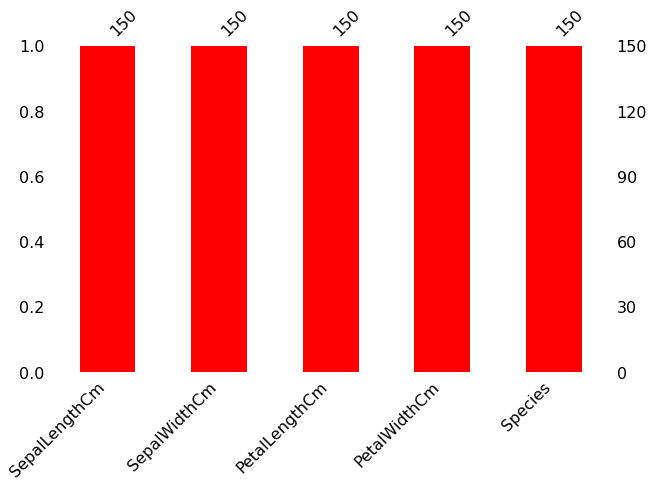

In [ ]:
msno.bar(df,figsize=(10,6),color='red')
plt.show()

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

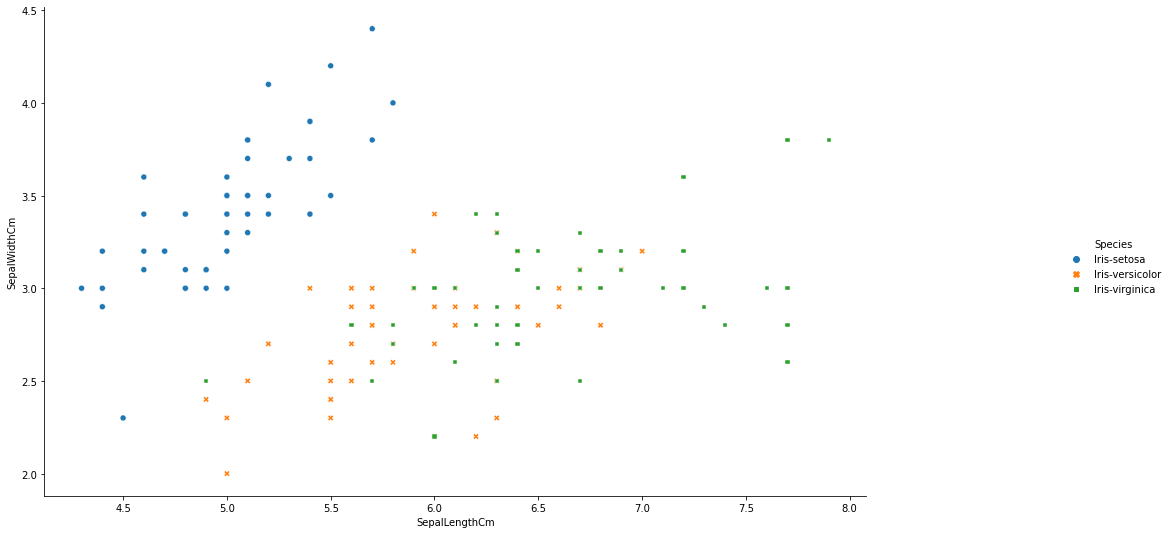

In [ ]:
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species',style='Species')
g.fig.set_size_inches(18,8)
plt.show()

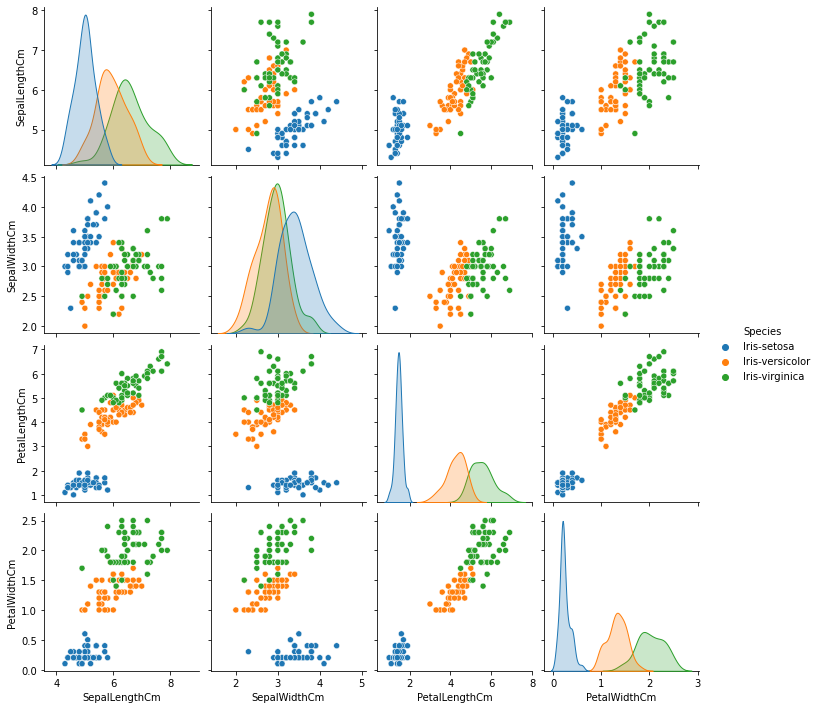

In [ ]:
sns.pairplot(df,hue='Species')
plt.show()

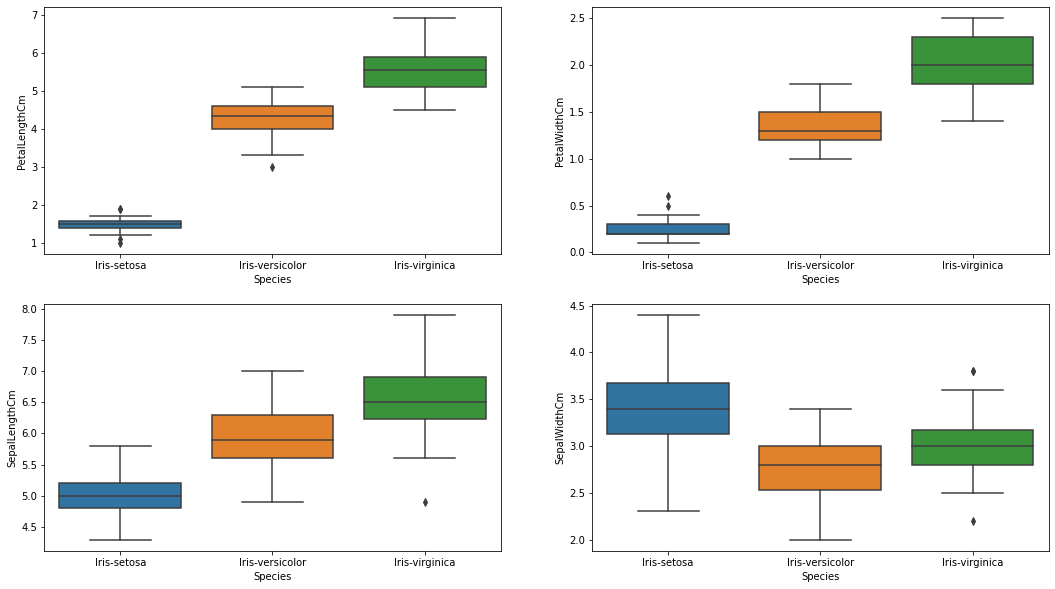

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)
plt.show()

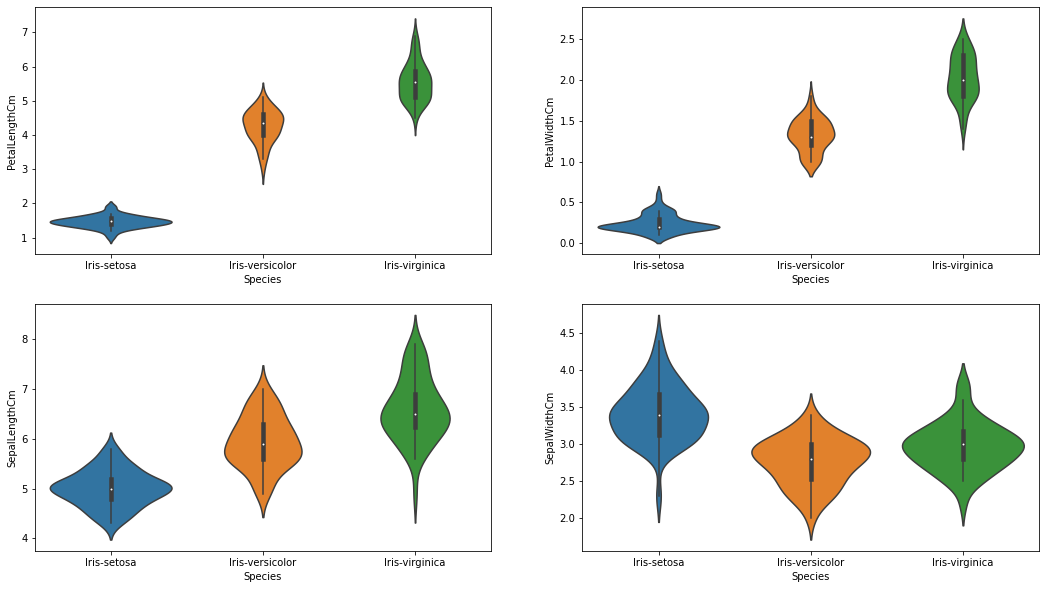

In [ ]:

plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
plt.show()

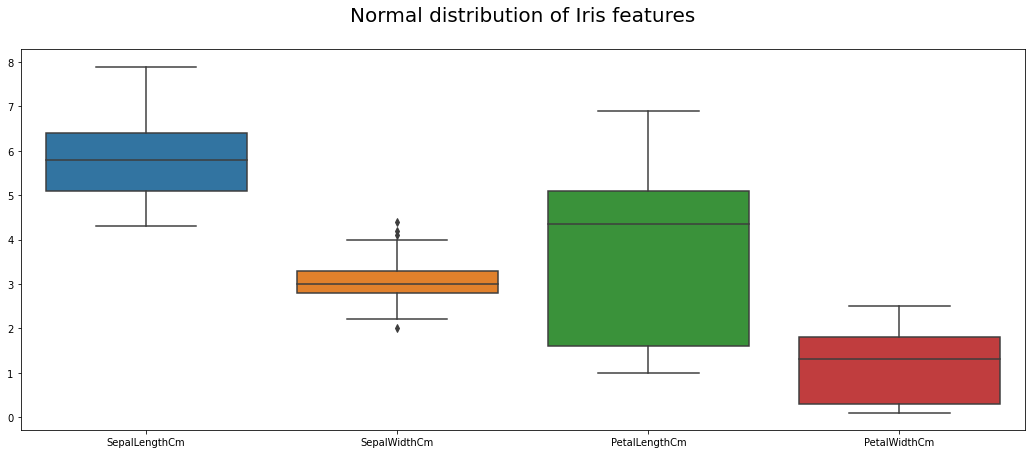

In [ ]:
plt.figure(figsize=(18,7))
sns.boxplot(data=df).set_title("Normal distribution of Iris features\n",size=20)
plt.show()

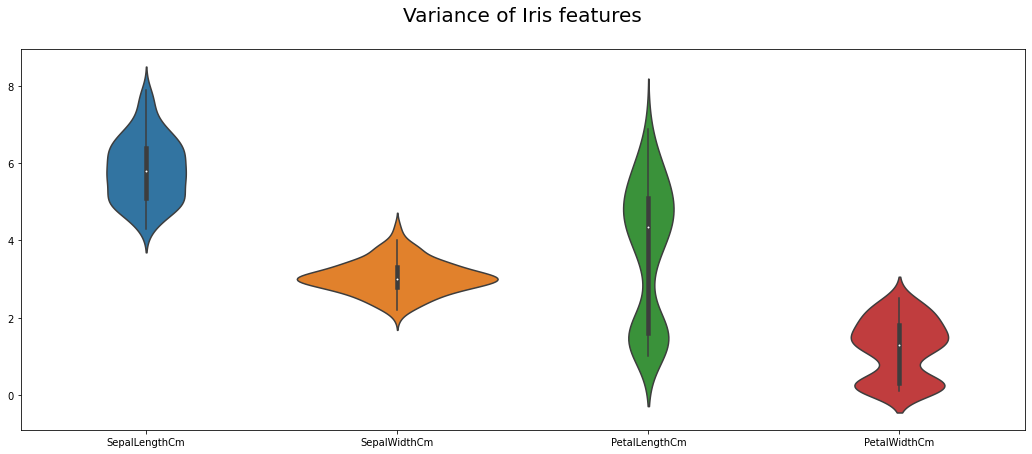

In [ ]:
plt.figure(figsize=(18,7))
sns.violinplot(data=df).set_title("Variance of Iris features\n",size=20)
plt.show()


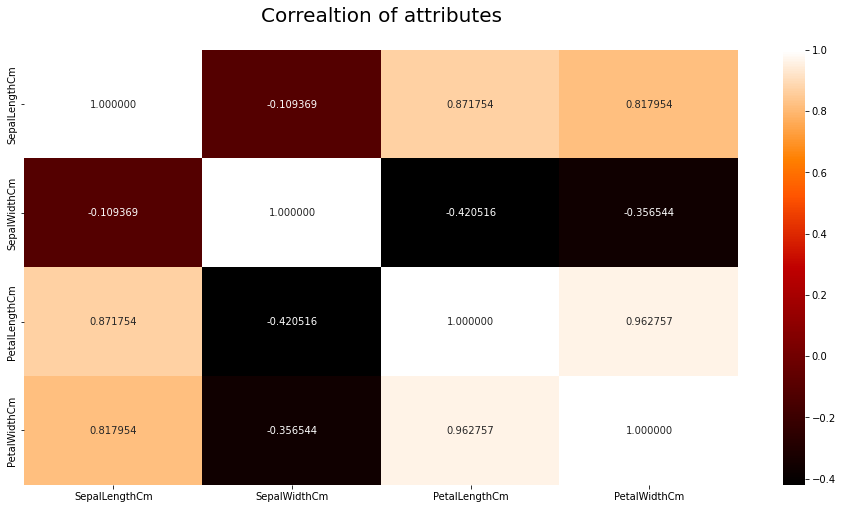

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='f',cmap='gist_heat').set_title('Correaltion of attributes\n',size=20)
plt.show()

# 5) Applying various ML Algorithms

In [ ]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.metrics import make_scorer,accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("All metrics included!")

All metrics included!


In [ ]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("All ML packages included!")

All ML packages included!


In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
acc_rf = round(accuracy_score(y_test,y_pred)*100,2)
rf_acc = round(rf.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of Random Forest\n",cm)
print("Accuracy of Random Forest = ",acc)
print("Precision of Random Forest = ",prec)
print("Recall of Random Forest = ",recall)
print("f1 score of Random Forest = ",f1)

Confusion matrix of Random Forest
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy of Random Forest =  1.0
Precision of Random Forest =  1.0
Recall of Random Forest =  1.0
f1 score of Random Forest =  1.0


In [ ]:
lg = LogisticRegression(solver='lbfgs',max_iter=400)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
acc_lg = round(accuracy_score(y_test,y_pred)*100,2)
lg_acc = round(lg.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of Logistic Regression\n",cm)
print("\nAccuracy of Logistic Regression = ",acc)
print("\nPrecision of Logistic Regression = ",prec)
print("\nRecall of Logistic Regression = ",recall)
print("\nf1 score of Logistic Regression = ",f1)

Confusion matrix of Logistic Regression
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy of Logistic Regression =  1.0

Precision of Logistic Regression =  1.0

Recall of Logistic Regression =  1.0

f1 score of Logistic Regression =  1.0


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_test,y_pred)*100,2)
knn_acc = round(knn.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Accuracy of K Nearest Neighbour =  0.9666666666666667

Precision of K Nearest Neighbour =  0.9666666666666667

Recall of K Nearest Neighbour =  0.9666666666666667

f1 score of K Nearest Neighbour =  0.9666666666666667


In [ ]:
gauss = GaussianNB()
gauss.fit(X_train,y_train)
y_pred = gauss.predict(X_test)
acc_gauss = round(accuracy_score(y_test,y_pred)*100,2)
gauss_acc = round(gauss.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]

Accuracy of K Nearest Neighbour =  0.9666666666666667

Precision of K Nearest Neighbour =  0.9666666666666667

Recall of K Nearest Neighbour =  0.9666666666666667

f1 score of K Nearest Neighbour =  0.9666666666666667


In [ ]:

lsvc = LinearSVC(max_iter=4000)
lsvc.fit(X_train,y_train)
y_pred = lsvc.predict(X_test)
acc_lsvc = round(accuracy_score(y_test,y_pred)*100,2)
lsvc_acc = round(lsvc.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy of K Nearest Neighbour =  1.0

Precision of K Nearest Neighbour =  1.0

Recall of K Nearest Neighbour =  1.0

f1 score of K Nearest Neighbour =  1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


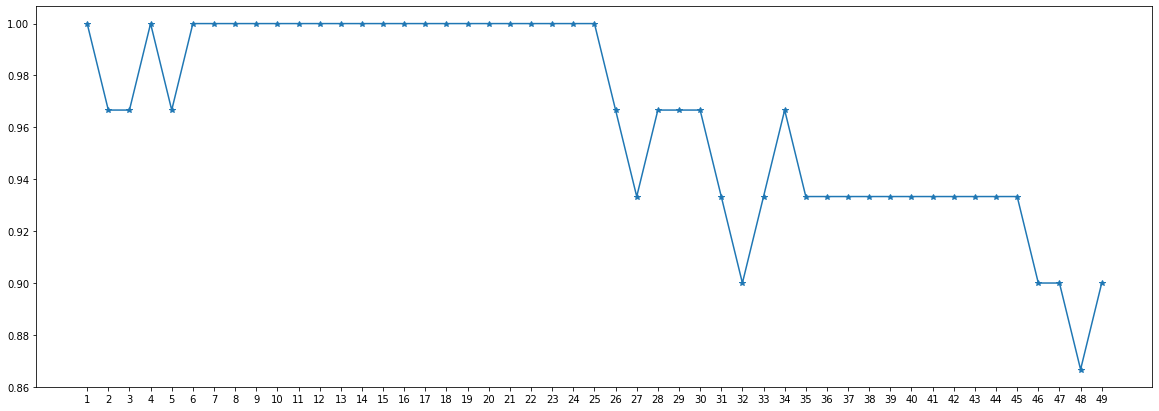

In [ ]:
plt.figure(figsize=(20,7))
a_index = list(range(1,50))
a = pd.Series()
x = range(1,50)
for i in list(range(1,50)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  prediction = model.predict(X_test)
  a = a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index,a,marker="*")
plt.xticks(x)
plt.show()

In [ ]:

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc_dt = round(accuracy_score(y_test,y_pred)*100,2)
dt_acc = round(dt.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy of K Nearest Neighbour =  1.0

Precision of K Nearest Neighbour =  1.0

Recall of K Nearest Neighbour =  1.0

f1 score of K Nearest Neighbour =  1.0


# 6)Comparision Between Accuracies of Various Applied ML Algorithms 

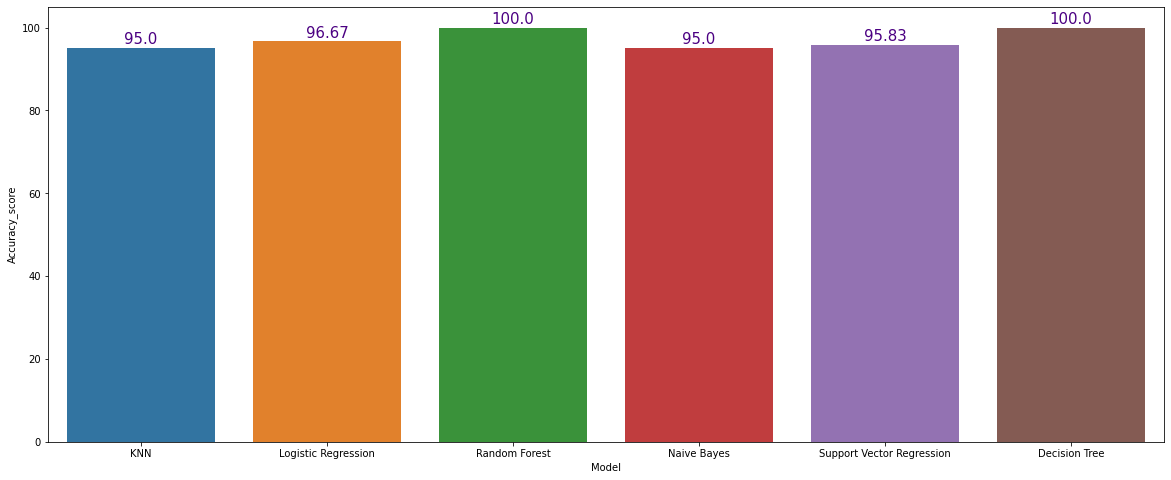

In [ ]:
res = pd.DataFrame(
    {
        'Model':['KNN','Logistic Regression','Random Forest','Naive Bayes','Support Vector Regression','Decision Tree'],
     'Score':[acc_knn,acc_lg,acc_rf,acc_gauss,acc_lsvc,acc_dt],
     'Accuracy_score':[knn_acc,lg_acc,rf_acc,gauss_acc,lsvc_acc,dt_acc]
    }
)


res
plt.figure(figsize=(20,8))
ax = sns.barplot(x='Model',y='Accuracy_score',data=res)
labels = (res['Accuracy_score'])
for i,v in enumerate(labels):
  ax.text(i,v+1,str(v),horizontalalignment='center',size=15,color='indigo')

Thus above visualization depicts that this dataset is best predicted using a Random forest or a decision tree classifier. This is so because two species have many similar features and differ by some minute difference in a combination of features,which cannot be separated by any form of regression. Hence, it can be classified better by a non-linear classifier like a decision tree or an array of decision trees (known as random forest)